# RT626 HW1 #1 Keggle 이미지 세트를 활용하여 CNN 구성하기 
## Directory 구조 조정하기

기본 데이터셋에는 25000장의 사진이 있는데 문제에서 제시한 바와 같이 Train에 1000장 Validation에 500장 Test에 500장을 할당하는 과정을 진행

In [1]:
import os, shutil

exec_path = os.getcwd()
root_path = os.path.join(exec_path,'dataset\\dogs-vs-cats')

origin_trainset_path = os.path.join(root_path,'train')

new_trainset_path = os.path.join(root_path,'n_train')
new_validationset_path = os.path.join(root_path,'n_validation')
new_testset_path = os.path.join(root_path,'n_test')

if not(os.path.isdir(new_trainset_path)):
    os.mkdir(new_trainset_path)
if not(os.path.isdir(new_validationset_path)):
    os.mkdir(new_validationset_path)
if not(os.path.isdir(new_testset_path)):
    os.mkdir(new_testset_path)


## 필요한 File 복사하기
만들어진 Directory에 많은 양의 데이터에서 소량의 데이터만 가져오는 코드

In [2]:
if not(os.path.isfile(new_trainset_path+'\\0\\cat.0.jpg')):
    os.mkdir(new_trainset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\0\\cat.500.jpg')):
    os.mkdir(new_validationset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\0\\cat.750.jpg')):
    os.mkdir(new_testset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_trainset_path+'\\1\\dog.0.jpg')):
    os.mkdir(new_trainset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\1\\dog.500.jpg')):
    os.mkdir(new_validationset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\1\\dog.750.jpg')):
    os.mkdir(new_testset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'1'), fname)
        shutil.copy(src, dst)


## CNN 네트워크를 구성하기
이번 프로젝트에서는 Keras에서 제공하는 함수를 사용하여 CNN Layer를 생성하고 해당 네트워크를 학습함

In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Network의 Hyperparameter를 설정하기
keras에서 제공하는 함수를 사용하여 Network를 설정한다.

In [4]:
from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Input 이미지를 정규화하기
이미지의 RGB 값은 알다시피 색상 별로 8-16bit 스케일로 표현된다. 활성함수는 대부분 이 값에 exponential한 값이 출력되기 때문에 input이 커지면 연산량도 많아진다. 따라서 이 값을 정규화하여 작은 스케일 [0,1]으로 선형 변환한다.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_trainset_path,
    target_size=(150, 150),
    batch_size=1,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    new_validationset_path,
    target_size=(150, 150),
    batch_size=1,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Network 학습시키기
앞서 Network의 형태는 함수를 이용해서 구성했다. 이후 학습에 사용될 이미지의 Path까지 함수를 이용하여 설정했다. 따라서 학습을 진행할 수 있다. 다음과 같은 코드를 통해서 네트워크를 학습시킬 수 있다.
HW1는 데이터 수가 적은 경우에도 효과적인 학습 진행을 위해서 Data Argumentation에 대해 공부하는 과제이다. 처음으로는 Data Argumentation없이 모델을 학습시키도록 하겠다.

### Non Data Argumentation
Non Data Argumentation학습은 주어진 Data를 갖고 학습을 진행하면 된다.

In [15]:
history = model.fit_generator(
    train_generator, steps_per_epoch = 30, epochs=30, 
    validation_data=validation_generator, validation_steps=50
    )

import datetime
_todaydateis = datetime.datetime.now().strftime("%y_%m_%d_%H%M")

model.save('nonargument'+ _todaydateis +'.h5')

21_04_23_1533


### Data Argumentation
적은 Data로 효과적인 학습을 하기위해서 Data Argumentation을 진행한다. Argumentated된 데이터는 사진을 왜곡, 회전, 선현 변환하여 쉽게 얻을 수 있다. Keras는 이런 변환을 위한 함수를 제공한다.

In [27]:
import tensorflow

model_arg = tensorflow.keras.models.Sequential()
model_arg.add(tensorflow.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_arg.add(tensorflow.keras.layers.experimental.preprocessing.RandomRotation(0.05))
model_arg.add(tensorflow.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(64,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(128,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(128,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Flatten())
model_arg.add(tensorflow.keras.layers.Dense(512, activation='relu'))
model_arg.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

model_arg.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Data Argumentation을 적용한 모델을 학습시킨다. 학습의 hyperparameter는 Non Data Argumentation 모델과 똑같게 설정한다.

In [28]:
history_arg = model_arg.fit_generator(
    train_generator, steps_per_epoch = 30, epochs=30, 
    validation_data=validation_generator, validation_steps=50
    )

import datetime
_todaydateis = datetime.datetime.now().strftime("%y_%m_%d_%H%M")

model.save('argument'+ _todaydateis +'.h5')

Epoch 1/30
30/30 [==============================] - 12s 401ms/step - loss: 0.6984 - acc: 0.5017 - val_loss: 0.6906 - val_acc: 0.5500
Epoch 2/30
30/30 [==============================] - 12s 385ms/step - loss: 0.6897 - acc: 0.5333 - val_loss: 0.6891 - val_acc: 0.5080
Epoch 3/30
30/30 [==============================] - 12s 390ms/step - loss: 0.6845 - acc: 0.5717 - val_loss: 0.6836 - val_acc: 0.5500
Epoch 4/30
30/30 [==============================] - 12s 399ms/step - loss: 0.6764 - acc: 0.6100 - val_loss: 0.6720 - val_acc: 0.5860
Epoch 5/30
30/30 [==============================] - 11s 380ms/step - loss: 0.6612 - acc: 0.5983 - val_loss: 0.6646 - val_acc: 0.5860
Epoch 6/30
30/30 [==============================] - 11s 374ms/step - loss: 0.6613 - acc: 0.5917 - val_loss: 0.7133 - val_acc: 0.5420
Epoch 7/30
30/30 [==============================] - 11s 372ms/step - loss: 0.6430 - acc: 0.6283 - val_loss: 0.6577 - val_acc: 0.6080
Epoch 8/30
30/30 [==============================] - 11s 373ms/step - 

## 학습 결과를 Visulize하기.
우리가 학습한 Network의 성능을 쉽게 알아볼 수 있도록 그래프를 이용해서 특성을 Plot한다.



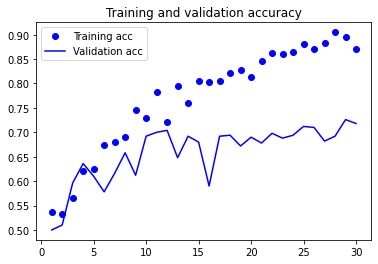

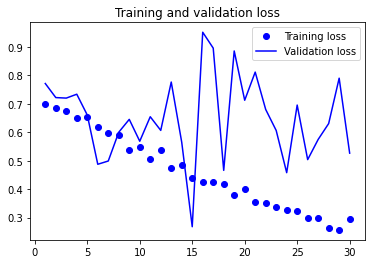

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

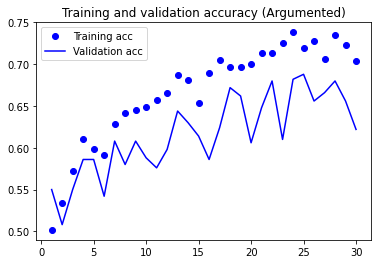

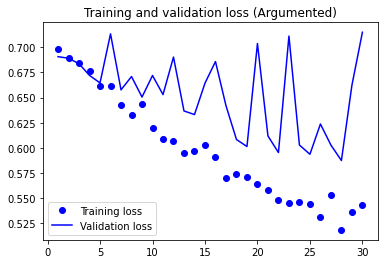

In [30]:
acc = history_arg.history['acc']
val_acc = history_arg.history['val_acc']
loss = history_arg.history['loss']
val_loss = history_arg.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy (Argumented)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss (Argumented)')
plt.legend()
plt.show()